# Introduccion a PCA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datos = {"ingreso" : [9136.81, 11709.94, 12416.79, 4875.73, 10065.03,
                      11755.33, 7401.78, 10291.38, 12002.42, 11787.76,
                      13347.65, 7676.76, 9808.56, 11556.47, 7875.49,
                      12486.19, 9242.40, 6867.09, 12946.25, 9167.36],

         "horas_trabajadas" : [40.38, 41.55, 41.91, 40.18, 41.69,
                               42.32, 41.57, 41.26, 42.01, 41.46,
                               41.71, 41.36, 40.82, 41.22, 41.11,
                               41.07, 41.20, 40.61, 41.52, 41.26]}

df = pd.DataFrame(datos)

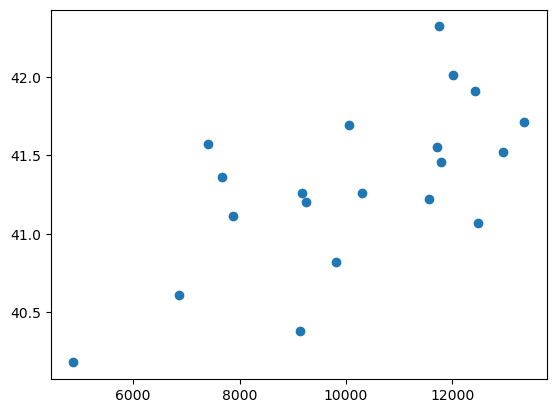

In [5]:
plt.scatter(df['ingreso'], df['horas_trabajadas'])

In [6]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=['ingreso', 'horas_trabajadas'])

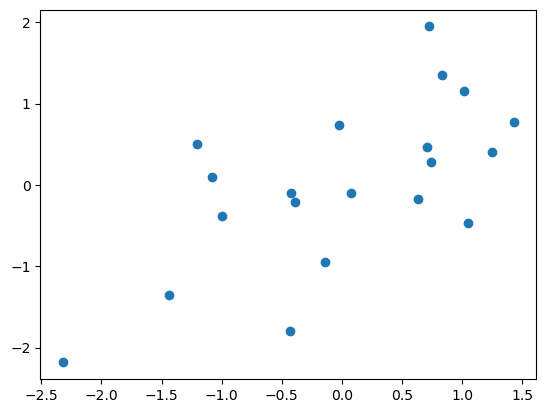

In [7]:
plt.scatter(df['ingreso'],df['horas_trabajadas'])

In [8]:
df.cov()

,ingreso,horas_trabajadas
ingreso,1.052632,0.682360
horas_trabajadas,0.682360,1.052632


In [10]:
from numpy.linalg import eig

In [11]:
valores, vectores = eig(df.con())

AttributeError: 'DataFrame' object has no attribute 'con'

In [ ]:
valores

In [ ]:
vectores

In [ ]:
cp1 = vectores[:,0]
cp2 = vectores[:,1]

In [ ]:
plt.scatter(df['Ingreso'], df['horas_trabajadas'])
plt.quiver(0,0,cp1[0]/abs(cp1[0])*valores[0],cp1[1]/abs(cp1[1])*valores[0])
plt.quiver(0,0,cp2[0]/abs(cp2[0])*valores[1],cp2[1]/abs(cp2[1])*valores[1])
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [16]:
datos = pd.read_csv('advertising.csv')
datos.head()

modelo = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=2)),
    ('regresion',LinearRegression())
])

X =datos[['TV','Radio','Newspaper']]
y =datos['Sales']

modelo.fit(X,y)
pca=modelo.named_steps['pca']
pca.components_

array([[ 0.20787391,  0.69139674,  0.69192412],
       [ 0.97814838, -0.14965532, -0.14432267]])

In [17]:
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)


In [20]:
lr = modelo.named_steps['regresion']
lr.coef_

array([2.06992121, 4.32260897])

In [21]:
lr.intercept_

15.130500000000001

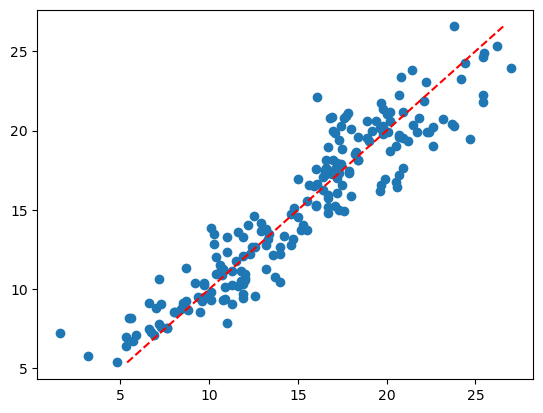

In [22]:
sales_pred = modelo.predict(X)
plt.scatter(datos['Sales'],sales_pred)
plt.plot([sales_pred.min(), sales_pred.max()],[sales_pred.min(), sales_pred.max()], '--r')

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2 = r2_score(datos['Sales'],sales_pred)
r2

0.8727746201783333